In [1]:
options(stringsAsFactors=F)
options(max.print=1000)
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggsci))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(circlize))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(corrplot))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(ggsignif))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(tidyverse))
options(bitmapType = 'cairo', device = 'png')

setwd('/psycl/g/mpsziller/lucia/CAD_UKBB/eQTL_PROJECT')
fold_notebook <- '/psycl/g/mpsziller/lucia/castom_cad_scz/jupyter_notebook/'
fold_cl <- "OUTPUT_GTEx/predict_CAD/Liver/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering/update_corrPCs/"
outFold <- sprintf('%sCAD_clustering/', fold_notebook)
type_data <- "tscore" 
type_input <- "zscaled" 
type_cluster <- "Cases"

# load results:
cl_endophenotype <- read.delim(sprintf('%stscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM_combined.txt', fold_cl), h=T, stringsAsFactors = F)
cl_endophenotype_HD <- read.delim(sprintf('%snominalAnalysis_tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM.txt', fold_cl), h=T, stringsAsFactors = F)
data_endophenotype_HD <- get(load(sprintf('%snominalAnalysis_tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM.RData', fold_cl)))
pheno_plot <- c('Hyperlipidemia', 'Coronary_artery_bypass_graft', 'Age_stroke', 'Chronic_obstructive_pulmonary_disease', 'Peripheral_vascular_disease', 'UAP')
        
cl_drug_response <- read.delim(sprintf('%swithMedication_tscore_corrPCs_zscaled_clusterCases_TreatResponse_pairwise.txt', fold_cl), h=T, stringsAsFactors = F)
phenotype_sign <- read.delim(sprintf("%s/filter_endopheno/Integrated_analysis_v2_all_groupwise_endophenotypes_v2.txt", fold_cl),
                             header = T, stringsAsFactors = F, sep = '\t')
colorFile <- sprintf('%scolor_pheno_type_UKBB.txt', fold_notebook)


In [21]:
dim(phenotype_sign[phenotype_sign$pval_corr <= 0.05,])
dim(phenotype_sign)
cl_endophenotype <- cl_endophenotype[!is.na(cl_endophenotype$pvalue),]
dim(cl_endophenotype[cl_endophenotype$pval_corr <= 0.05,])
dim(cl_endophenotype)

phenotype_sign[phenotype_sign$pval_corr <= 0.05,]

[1] 37 15

[1] 850  15

[1] 31 15

[1] 3168   15

,pheno_id,Field,meaning,beta,se_beta,z,pvalue,OR_or_Beta,CI_low,CI_up,type_pheno,pval_corr,comp,pval_corr_overall,pheno_type
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
4,30630,Apolipoprotein A,NA,0.06316175,0.01571026,4.020415,5.835931e-05,0.06316175,0.03237022,0.09395329,CONTINUOUS,2.480271e-03,gr1_vs_all,5.010549e-02,Blood_biochemistry
5,30640,Apolipoprotein B,NA,-0.12785228,0.01330612,-9.608532,8.327989e-22,-0.12785228,-0.15393179,-0.10177276,CONTINUOUS,1.415758e-19,gr1_vs_all,7.865169e-18,Blood_biochemistry
10,30690,Cholesterol,NA,-0.05361475,0.01242158,-4.316257,1.595613e-05,-0.05361475,-0.07796061,-0.02926889,CONTINUOUS,9.041807e-04,gr1_vs_all,1.506938e-02,Blood_biochemistry
19,30780,LDL direct,NA,-0.07382562,0.01235141,-5.977102,2.315207e-09,-0.07382562,-0.09803394,-0.04961731,CONTINUOUS,1.967926e-07,gr1_vs_all,3.644235e-06,Blood_biochemistry
128,30640,Apolipoprotein B,NA,0.07181949,0.01431039,5.018697,5.253240e-07,0.07181949,0.04377165,0.09986733,CONTINUOUS,8.930507e-05,gr2_vs_all,7.087565e-04,Blood_biochemistry
129,30650,Aspartate aminotransferase,NA,0.06265707,0.01699896,3.685935,2.285499e-04,0.06265707,0.02933971,0.09597442,CONTINUOUS,7.770696e-03,gr2_vs_all,1.269697e-01,Blood_biochemistry
141,30770,IGF-1,NA,-0.05117026,0.01703616,-3.003626,2.671590e-03,-0.05117026,-0.08456053,-0.01778000,CONTINUOUS,4.848779e-02,gr2_vs_all,8.410395e-01,Blood_biochemistry
153,30000,White blood cell (leukocyte) count,NA,0.06672029,0.01695734,3.934596,8.364972e-05,0.06672029,0.03348451,0.09995608,CONTINUOUS,6.767097e-03,gr2_vs_all,6.583414e-02,Blood_count
165,30120,Lymphocyte count,NA,0.06247775,0.01690754,3.695260,2.203139e-04,0.06247775,0.02933958,0.09561591,CONTINUOUS,7.770696e-03,gr2_vs_all,1.269697e-01,Blood_count


In [7]:
# create summary table for tested phenotypes
pheno_res <- get(load('OUTPUT_GTEx/predict_CAD/Liver/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering/update_corrPCs/rescaleCont_withMedication_tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM.RData'))
pheno_res_nomed <- get(load('OUTPUT_GTEx/predict_CAD/Liver/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering/update_corrPCs/rescaleCont_withoutMedication_tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM.RData'))

cov_test <- c(colnames(pheno_res$covDat)[1:12], substring(colnames(pheno_res$covDat)[-(1:12)], 2))
cov_test[cov_test == "Gender"] <- "Sex"
pheno_info <- pheno_res$phenoInfo %>% 
    mutate(Covariates = paste0(cov_test, collapse = ',')) %>% 
    filter(pheno_id %in% cl_endophenotype$pheno_id) %>%
    mutate(pheno_type = case_when(pheno_id %in% c('129', '130') ~ "Early_life_factors",
                                    TRUE ~ pheno_type))

cov_test <- colnames(pheno_res_nomed$covDat)
cov_test[cov_test == "Gender"] <- "Sex"
pheno_info_nomed <- pheno_res_nomed$phenoInfo %>% 
    mutate(Covariates = paste0(cov_test, collapse = ',')) %>% 
    filter(pheno_id %in% cl_endophenotype$pheno_id) %>%
    mutate(pheno_type = case_when(pheno_id %in% c('129', '130') ~ "Early_life_factors",
                                    TRUE ~ pheno_type))

pheno_info_tot <- rbind(pheno_info, pheno_info_nomed) %>%
    group_by(pheno_type) %>%
    summarise(N=n(), pheno_id = paste0(pheno_id, collapse = ','), 
              Covariates = unique(Covariates))
pheno_info_tot
write.table(sprintf('%sendophenotype_tested_class.txt', outFold), x = pheno_info_tot, sep = '\t', col.names = T, row.names = F)


pheno_type,N,pheno_id,Covariates
<chr>,<int>,<chr>,<chr>
Alcohol,26,"1558,1568,1578,1588,1598,1608,1618,1628,2664_5,2664_1,2664_2,2664_3,2664_4,3731,3859_5,3859_1,3859_2,3859_3,4407,4418,4429,4440,4451,20117_2,20117_0,20117_1",
Arterial_stiffness,8,"4194,4195,4196,4198,4199,4200,4204,21021",
Blood_biochemistry,30,"30600,30610,30620,30630,30640,30650,30660,30670,30680,30690,30700,30710,30720,30730,30740,30750,30760,30770,30780,30790,30800,30810,30820,30830,30840,30850,30860,30870,30880,30890",
Blood_count,31,"30000,30010,30020,30030,30040,30050,30060,30070,30080,30090,30100,30110,30120,30130,30140,30150,30160,30170,30180,30190,30200,30210,30220,30230,30240,30250,30260,30270,30280,30290,30300",
Blood_count_ratio,4,"LMR,PLR,NLR,ELR",
Blood_pressure,5,"93,94,102,4079,4080",
Body_size_measures,4,"48,49,21001,21002",
Diet,57,"1488,1289,1299,1309,1319,1329,1339,1349,1359,1369,1379,1389,1408,1418_2,1418_1,1418_3,1418_4,1418_5,1418_6,1428_3,1428_0,1428_1,1428_2,1438,1448_3,1448_1,1448_2,1448_4,1458,1468_3,1468_1,1468_2,1468_4,1468_5,1478,1498,1508_2,1508_1,1508_3,1508_4,1518,1528,1538_0,1538_1,1538_2,1548,2654_7,2654_2,2654_4,2654_6,2654_8,2654_9,6144_5,6144_4,6144_3,6144_1,6144_2",
Early_life_factors,2,"129,130",


In [11]:
# load results
tmp_nominal <- data_endophenotype_HD
reg_res <- tmp_nominal$bin_reg
phenoDat <- tmp_nominal$phenoDat
cl <- tmp_nominal$cl
P <- length(unique(cl$gr))
gr_id <- sort(unique(cl$gr))
gr_color <- pal_d3(palette = 'category20')(P)
phenoDat <- phenoDat[, colnames(phenoDat) %in% pheno_plot]
phenoDat <- cbind(data.frame(gr = paste0('gr', cl$gr), stringsAsFactors = F), phenoDat)


In [15]:
sum(reg_res$pvalue <= 0.01)
reg_res[order(reg_res$pvalue)[1:18],]
dim(reg_res)
reg_res[reg_res$pheno_id %in% pheno_plot,]

[1] 6

,pheno_id,Field,meaning,beta,se_beta,z,pvalue,OR_or_Beta,CI_low,CI_up,type_pheno,pval_corr,comp,pval_corr_overall
,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
142,Hyperlipidemia,NA,NA,-0.27589620,0.07325104,-3.766448,0.0001655868,0.7588917,0.65739804,0.876054650,CAT_SINGLE_UNORDERED,0.005464363,gr5_vs_all,0.155357
114,Peripheral_vascular_disease,NA,NA,0.34475656,0.11535092,2.988763,0.0028010930,1.4116462,1.12600156,1.769753384,CAT_SINGLE_UNORDERED,0.092436068,gr4_vs_all,1.000000
93,Smoking,NA,NA,-0.12885231,0.04480814,-2.875645,0.0040320299,0.8791038,0.80519188,0.959800370,CAT_SINGLE_UNORDERED,0.133056988,gr3_vs_all,1.000000
30,Age_stroke,NA,NA,-1.33238018,0.49530490,-2.690020,0.0072722398,-1.3323802,-2.30315995,-0.361600404,CONTINUOUS,0.098395003,gr1_vs_all,1.000000
10,Hyperlipidemia,NA,NA,-0.08282971,0.03134841,-2.642230,0.0082362075,0.9205079,0.86565273,0.978839143,CAT_SINGLE_UNORDERED,0.098395003,gr1_vs_all,1.000000
19,Chronic_obstructive_pulmonary_disease,NA,NA,0.13240439,0.05064914,2.614149,0.0089450002,1.1415699,1.03368895,1.260709768,CAT_SINGLE_UNORDERED,0.098395003,gr1_vs_all,1.000000
42,Hypertension,NA,NA,0.09045417,0.03634692,2.488633,0.0128235121,1.0946713,1.01940131,1.175499104,CAT_SINGLE_UNORDERED,0.265849641,gr2_vs_all,1.000000
68,UAP,NA,NA,0.12343218,0.05173554,2.385830,0.0170406453,1.1313733,1.02227689,1.252112301,CAT_SINGLE_UNORDERED,0.281170648,gr3_vs_all,1.000000
52,Chronic_obstructive_pulmonary_disease,NA,NA,-0.13468832,0.05731655,-2.349903,0.0187783134,0.8739883,0.78111984,0.977897962,CAT_SINGLE_UNORDERED,0.265849641,gr2_vs_all,1.000000


[1] 165  14

,pheno_id,Field,meaning,beta,se_beta,z,pvalue,OR_or_Beta,CI_low,CI_up,type_pheno,pval_corr,comp,pval_corr_overall
,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
2,UAP,NA,NA,0.0341449437,0.04033117,0.84661430,0.3972101379,1.03473457,0.95609051,1.1198476,CAT_SINGLE_UNORDERED,0.728218586,gr1_vs_all,1.000000
5,Coronary_artery_bypass_graft,NA,NA,-0.0727069344,0.04056396,-1.79240226,0.0730685527,0.92987330,0.85880719,1.0068201,CAT_SINGLE_UNORDERED,0.344466034,gr1_vs_all,1.000000
10,Hyperlipidemia,NA,NA,-0.0828297071,0.03134841,-2.64223012,0.0082362075,0.92050789,0.86565273,0.9788391,CAT_SINGLE_UNORDERED,0.098395003,gr1_vs_all,1.000000
15,Peripheral_vascular_disease,NA,NA,-0.2599642179,0.11940143,-2.17722872,0.0294635068,0.77107918,0.61018889,0.9743919,CAT_SINGLE_UNORDERED,0.243073931,gr1_vs_all,1.000000
19,Chronic_obstructive_pulmonary_disease,NA,NA,0.1324043894,0.05064914,2.61414906,0.0089450002,1.14156986,1.03368895,1.2607098,CAT_SINGLE_UNORDERED,0.098395003,gr1_vs_all,1.000000
30,Age_stroke,NA,NA,-1.3323801778,0.49530490,-2.69002016,0.0072722398,-1.33238018,-2.30315995,-0.3616004,CONTINUOUS,0.098395003,gr1_vs_all,1.000000
35,UAP,NA,NA,-0.0008918737,0.04361290,-0.02044977,0.9836845830,0.99910852,0.91725332,1.0882684,CAT_SINGLE_UNORDERED,0.983684583,gr2_vs_all,1.000000
38,Coronary_artery_bypass_graft,NA,NA,0.0783125650,0.04282951,1.82847233,0.0674786947,1.08146063,0.99438411,1.1761623,CAT_SINGLE_UNORDERED,0.371132821,gr2_vs_all,1.000000
43,Hyperlipidemia,NA,NA,0.0728890080,0.03387730,2.15155897,0.0314321066,1.07561115,1.00651183,1.1494543,CAT_SINGLE_UNORDERED,0.265849641,gr2_vs_all,1.000000


In [17]:
## function for plot
plot_nominal_endopheno <- function(phenoDat, reg_res, gr_id, gr_color, name_pheno){

  P <- length(gr_id)
    
  tmp_reg <- reg_res[reg_res$pheno_id == name_pheno,]
  tmp_reg <- tmp_reg[match(paste0('gr',gr_id, '_vs_all'),tmp_reg$comp),]
  tmp_reg$star_ann <- format(tmp_reg$pvalue, scientific = T,  digits = 2)
  tmp_reg$star_ann[tmp_reg$pvalue >= 0.05 ] <- '-'
  #tmp_reg$star_ann[ tmp_reg$pvalue <= 0.05 & tmp_reg$pvalue > 0.01] <- '*'
  #tmp_reg$star_ann[ tmp_reg$pvalue <= 0.01 & tmp_reg$pvalue > 0.001] <- '**'
  #tmp_reg$star_ann[ tmp_reg$pvalue <= 0.001 & tmp_reg$pvalue > 0.0001] <- '***'
  #tmp_reg$star_ann[ tmp_reg$pvalue <= 0.0001] <- '****'
  
  new <- phenoDat[!is.na(phenoDat[, name_pheno]), ]

  if(is.integer(new[, name_pheno]) & length(unique(new[,name_pheno])) == 2){
        
    val <- max(unique(new[,name_pheno]))
    new_df <- data.frame(perc = as.vector(sapply(gr_id,  function(y) 
        sum(new[, name_pheno] == val & new$gr == paste0('gr',y))/sum(new$gr == paste0('gr',y)))))
    new_df$gr <- paste0('gr',gr_id)
    new_df$gr <- factor(new_df$gr, levels = paste0('gr', gr_id))
    
    plot_out <- ggplot(new_df, aes(x = gr, y = perc, fill = gr))+
      geom_bar(size = 1, alpha = 0.8, stat = 'identity', width = 0.7)+
      xlab('')+ ylab(paste0('Percentage'))+ 
      scale_fill_manual(values = gr_color)+
      guides(fill = FALSE)+
      ggtitle(name_pheno)+
      # annotate("text", x = 1:P, y = rep(max(new_df$perc)+0.02, P), label =formatC(tmp_reg$pvalue,format="e", digits = 2), size = 3)+
      annotate("text", x = 1:P, y = rep(max(new_df$perc)+ max(new_df$perc)*0.03, P), 
               label =tmp_reg$star_ann, size = 4.5)+
      theme_bw()+
      theme(legend.position = 'none', 
            plot.title=element_text(hjust = 0.5, size = 14), 
            axis.text = element_text(size=14),
            axis.title = element_text(size=14))
    
  }else{
    if(is.integer(new[, name_pheno]) & length(unique(new[,name_pheno])) <= 10){
    
    val <- sort(unique(new[, name_pheno]))
    new_df <- data.frame(perc = as.vector(sapply(gr_id,  function(y) 
        sapply(val, function(x) sum(new[, name_pheno] == x & new$gr == paste0('gr',y))/sum(new$gr == paste0('gr',y))))))
    new_df$gr <- unlist(lapply(paste0('gr',gr_id), function(x) rep(x, length(val))))    
    new_df$value <- rep(val, P) 
    new_df$gr <- factor(new_df$gr, levels = paste0('gr', gr_id))
    new_df$value <- factor(new_df$value, levels = val)
    val_max <- max(sapply(gr_id, function(x) sum(new_df$perc[new_df$gr == paste0('gr', x)])))
    
    
    plot_out <- ggplot(new_df, aes(x = gr, y = perc, fill = value, color = gr))+
      geom_bar(size = 1, alpha = 0.8, stat = 'identity', width = 0.7)+
      xlab('')+ ylab('Percentage')+
      scale_color_manual(values = gr_color)+
      scale_fill_grey(start=0.9, end=0.1)+
      guides(color = FALSE)+
      labs(fill = '')+
      ggtitle(name_pheno)+
      # annotate("text", x = 1:P, y = rep(1.05, P), label =formatC(tmp_reg$pvalue,format="e", digits = 2), size = 3)+
      annotate("text", x = 1:P, y = rep(val_max+ val_max*0.03, P), label =tmp_reg$star_ann, size = 4.5)+
      theme_bw()+
      theme(legend.position = 'bottom', 
            plot.title=element_text(hjust = 0.5, size = 14), 
            legend.text = element_text(size = 12),
            axis.text = element_text(size=14),
            axis.title = element_text(size=14))
      
    }else{
      if(is.numeric(phenoDat[, name_pheno]) | (is.integer(phenoDat[, name_pheno])
                                               & length(unique(phenoDat[, name_pheno])) >= 10)){
        
        new <- phenoDat[!is.na(phenoDat[, name_pheno]), ]
        new_df <- data.frame(value = new[,name_pheno], gr = new$gr)
        new_df$gr <- factor(new_df$gr, levels = paste0('gr', gr_id))
      
        plot_out <- ggplot(new_df, aes(x = gr, y = value, fill = gr))+
          geom_violin(alpha = 0.8)+
          geom_boxplot(width=0.2, fill="white")+
          xlab('')+ ylab('')+
          scale_fill_manual(values = gr_color, drop = F)+
          ggtitle(name_pheno)+
          # annotate("text", x = 1:P, y = rep(max(new_df$value) + 3, P), label =formatC(tmp_reg$pvalue,format="e", digits = 2), size = 3)+
          annotate("text", x = 1:P, y = rep(max(new_df$value) + max(new_df$value)*0.03, P), label = tmp_reg$star_ann, size = 4.5)+
          theme_bw()+
          theme(legend.position = 'none', 
            plot.title=element_text(hjust = 0.5, size = 14), 
            axis.text = element_text(size=14),
            axis.title = element_text(size=14))
      }
    }
  }
    return(plot_out)
}
                       

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


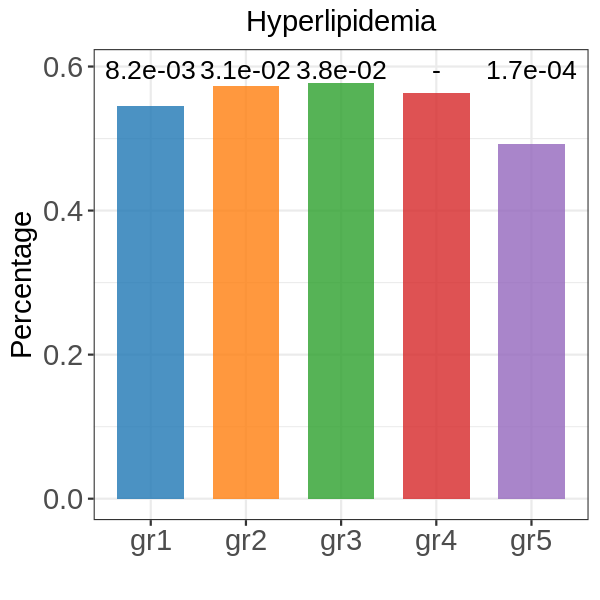

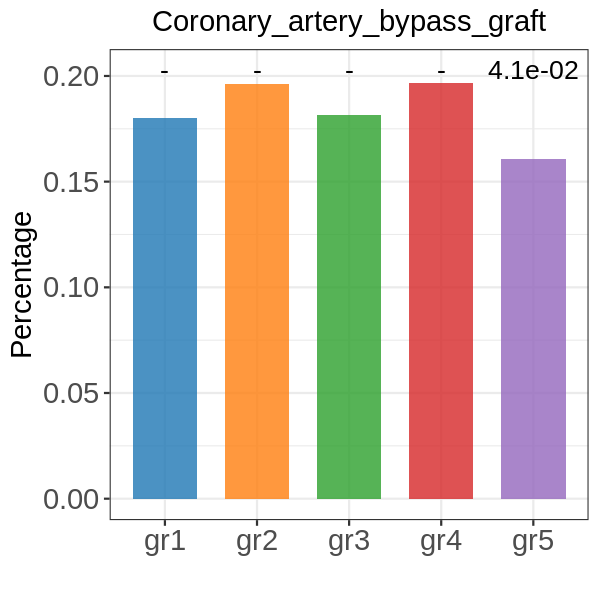

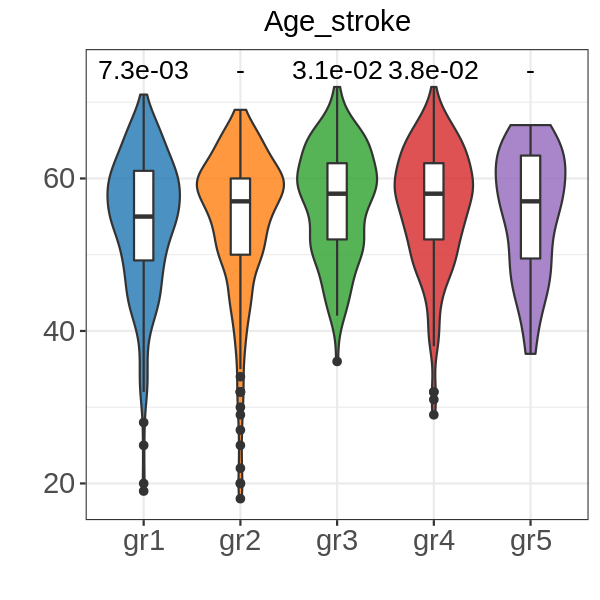

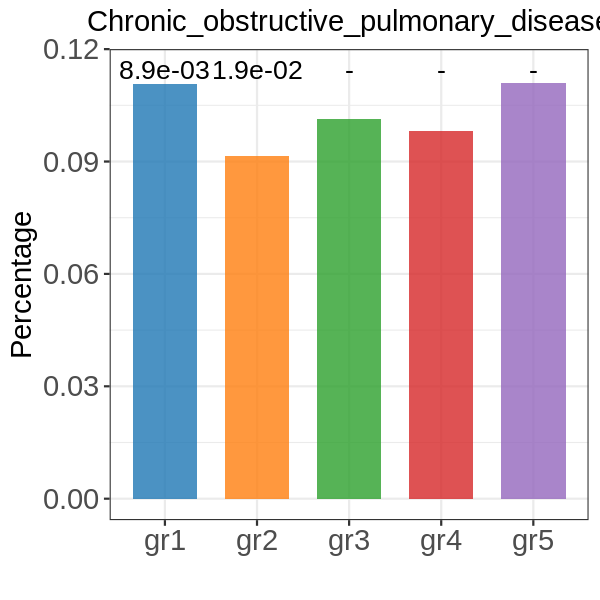

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


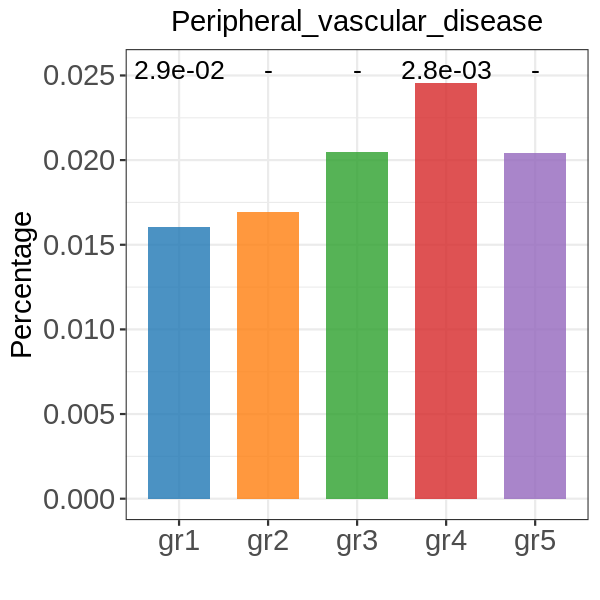

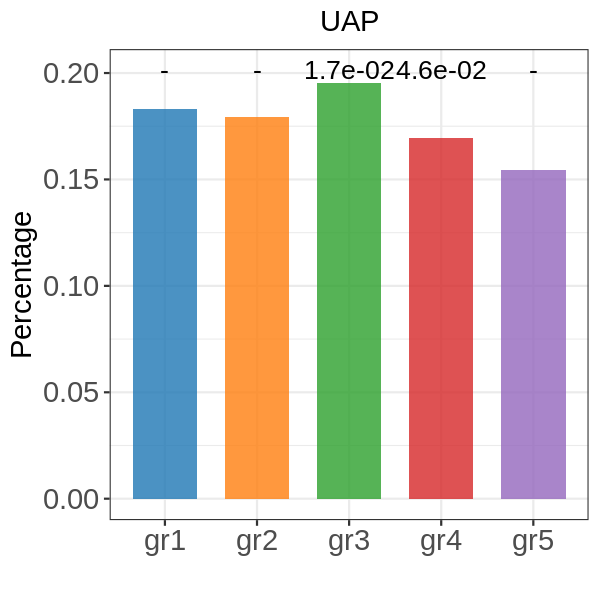

In [18]:
#### plot endophenotype (original) ####
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 150)

pl <- list()
for(i in 1:length(pheno_plot)){
    
    pl[[i]] <- plot_nominal_endopheno(phenoDat = phenoDat, 
                       reg_res = reg_res, gr_id = gr_id, 
                       gr_color = gr_color, 
                       name_pheno = pheno_plot[i])
    ggsave(filename = sprintf('%s%s_%s_cluster%s_PGmethod_HKmetric_phenoSelected%s.pdf', outFold, type_data, type_input, type_cluster,  pheno_plot[i]), 
          width = 4, height = 4, plot = pl[[i]], device = 'pdf')

}
pl

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[[1]]

[[2]]


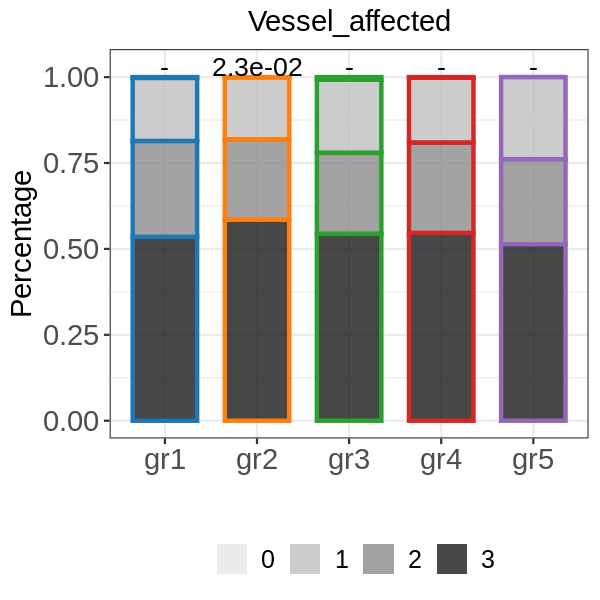

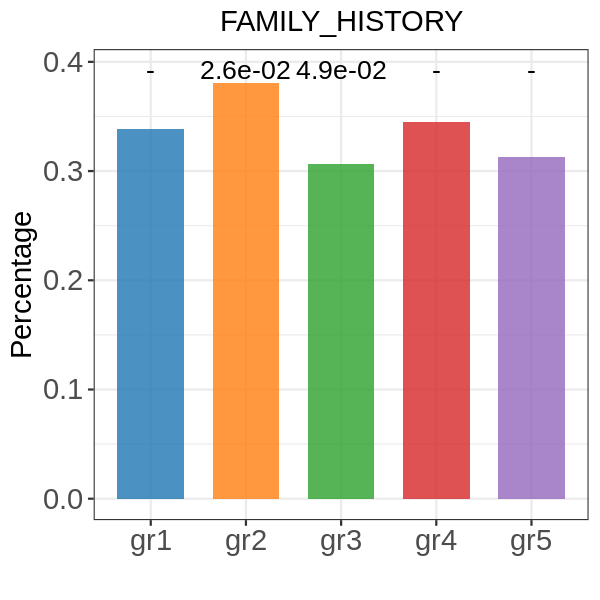

In [19]:
#### plot endophenotype (GermanV) ####
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 150)

cohort_name_id <- c(5)
phenoRegFile <- paste0('OUTPUT_GTEx/predict_CAD/Liver/200kb/CAD_GWAS_bin5e-2/Meta_Analysis_CAD/CAD_HARD_clustering/update_corrPCs/tscore_corrPCs_zscaled_clusterCases_phenoAssociationGLM_prediction_modelUKBB.RData')
# pheno_plot <- c('Gensini_score', 'Vessel_affected')
pheno_plot <- c('Vessel_affected', 'FAMILY_HISTORY')

tmp <- get(load(phenoRegFile))

reg_res <- tmp$bin_reg[[cohort_name_id]]
phenoDat <- tmp$phenoDat[[cohort_name_id]]
cl <- tmp$cl[[cohort_name_id]]
P <- length(unique(cl$gr))
gr_id <- sort(unique(cl$gr))
gr_color <- pal_d3(palette = 'category20')(P)

phenoDat <- phenoDat[match(cl$id,phenoDat$Individual_ID),]
phenoDat <- phenoDat[, colnames(phenoDat) %in% pheno_plot]
phenoDat <- cbind(data.frame(gr = paste0('gr', cl$gr), stringsAsFactors = F), phenoDat)

# plot
pl <- list()
for(i in 1:length(pheno_plot)){
    pl[[i]] <- plot_nominal_endopheno(phenoDat = phenoDat, 
                       reg_res = reg_res, gr_id = gr_id, 
                       gr_color = gr_color, 
                       name_pheno = pheno_plot[i])
    if(i==1){
         
       ggsave(filename = sprintf('%s%s_%s_predictCluster%s_PGmethod_HKmetric_phenoSelected%s.pdf', outFold, type_data, type_input, type_cluster,  pheno_plot[i]), 
          width = 4, height = 4.5, plot = pl[[i]], device = 'pdf')
    }else{
          ggsave(filename = sprintf('%s%s_%s_predictCluster%s_PGmethod_HKmetric_phenoSelected%s.pdf', outFold, type_data, type_input, type_cluster,  pheno_plot[i]), 
          width = 4, height = 4, plot = pl[[i]], device = 'pdf')
    }
   

}
pl

In [20]:
reg_res[order(reg_res$pvalue)[1:5],]

,pheno_id,type_pheno,beta,se_beta,z,pvalue,OR_or_Beta,CI_low,CI_up,pval_corr,comp,pval_corr_overall
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
42,Vessel_affected,CAT_ORD,0.2032327,0.08942698,2.272610,0.02313951,1.2253575,1.0283535,1.4601020,0.2772818,gr2_vs_all,1
24,FAMILY_HISTORY,CAT_SINGLE_BINARY,0.2125268,0.09572582,2.220162,0.02640779,1.2367993,1.0252204,1.4920425,0.2772818,gr2_vs_all,1
45,FAMILY_HISTORY,CAT_SINGLE_BINARY,-0.2862148,0.14537948,-1.968743,0.04898265,0.7511013,0.5648736,0.9987246,0.6985855,gr3_vs_all,1
60,ANTIHYPERTADMISSION,CAT_SINGLE_BINARY,0.3585693,0.19542447,1.834823,0.06653195,1.4312802,0.9758410,2.0992795,0.6985855,gr3_vs_all,1
26,AN_ACVB,CAT_SINGLE_BINARY,0.2349471,0.12842499,1.829450,0.06733224,1.2648418,0.9833784,1.6268659,0.3837205,gr2_vs_all,1


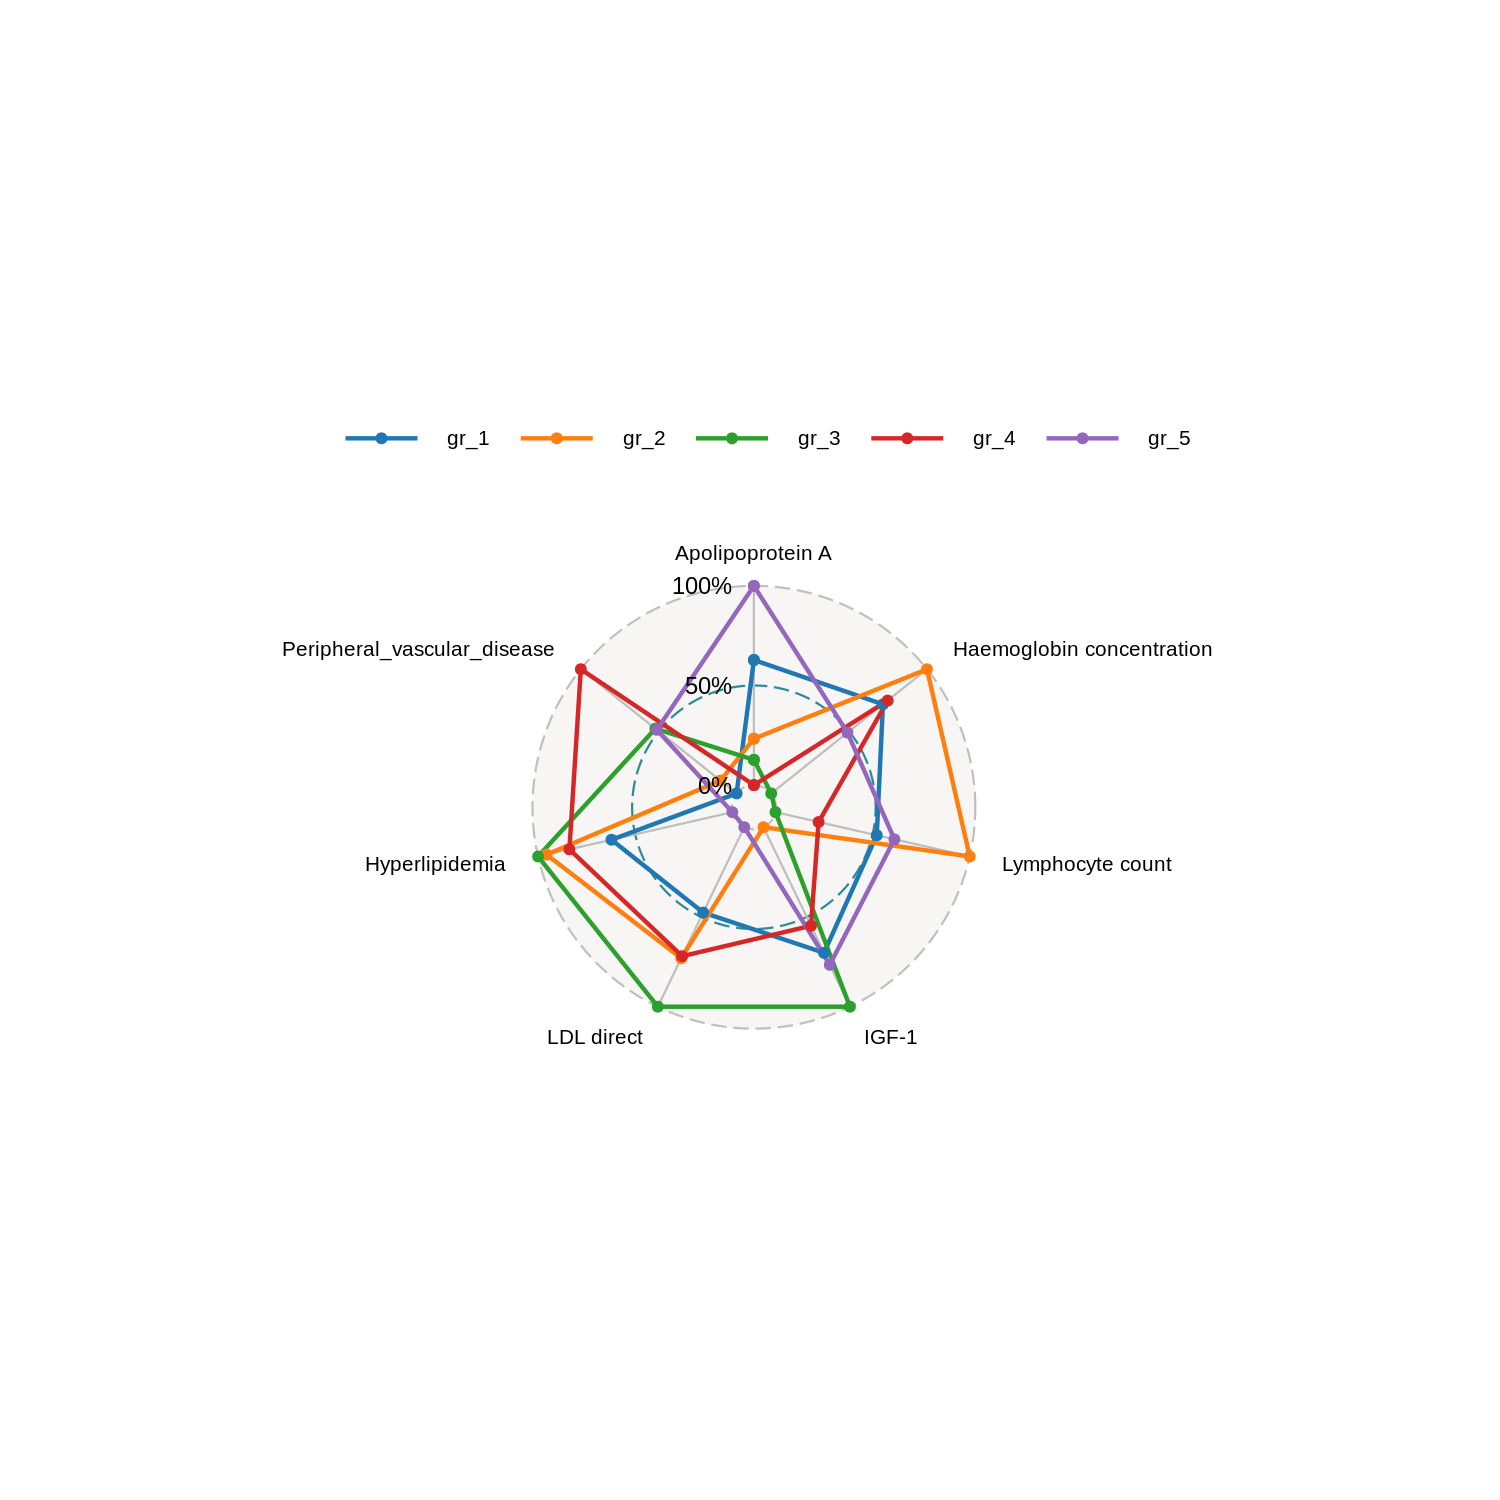

In [42]:
### spired plot ###
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 150)

library(scales)
library(ggradar)

keep_pheno_sp <- c('Apolipoprotein A', 'Haemoglobin concentration',
                    'Lymphocyte count', 'IGF-1', 'LDL direct', 'Hyperlipidemia', 
                   'Peripheral_vascular_disease')
tmp <- get(load(sprintf('%srescaleCont_withMedication_tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM.RData', fold_cl)))
tmp_nomed <- get(load(sprintf('%srescaleCont_withoutMedication_tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM.RData', fold_cl)))
res_cl <- tmp$cl

pheno_id <- tmp$phenoInfo$pheno_id[match(keep_pheno_sp, tmp$phenoInfo$Field)]
pheno_id <- pheno_id[!is.na(pheno_id)]
pheno_id_nomed <- tmp_nomed$phenoInfo$pheno_id[match(keep_pheno_sp, tmp_nomed$phenoInfo$Field)]
pheno_id_nomed <- pheno_id_nomed[!is.na(pheno_id_nomed)]
pheno_id_nom <-  colnames(tmp_nominal$phenoDat)[match(keep_pheno_sp, colnames(tmp_nominal$phenoDat))]
pheno_id_nom <- pheno_id_nom[!is.na(pheno_id_nom)]

phenoDat_tot <- cbind(tmp$phenoDat[,pheno_id], 
                      tmp_nomed$phenoDat[, pheno_id_nomed],
                      tmp_nominal$phenoDat[, pheno_id_nom])

colnames(phenoDat_tot) <- keep_pheno_sp

# phenoDat_tot$Age_stroke <- rescale(phenoDat_tot$Age_stroke)
# phenoDat_tot[, 'Apolipoprotein A'] <- rescale(phenoDat_tot[, 'Apolipoprotein A'])
# phenoDat_tot[, 'LDL direct'] <- rescale(phenoDat_tot[, 'LDL direct'])
# phenoDat_tot[, 'Haemoglobin concentration'] <- rescale(phenoDat_tot[, 'Haemoglobin concentration'])
# phenoDat_tot[, 'Lymphocyte count'] <- rescale(phenoDat_tot[, 'Lymphocyte count'])

# compute mean across groups
df_mean <- t(sapply(gr_id, function(x) colMeans(phenoDat_tot[res_cl$gr == x,], na.rm = T)))
df_mean <- cbind(data.frame(group = paste0('gr_',gr_id)), df_mean)
df_mean[, -1] <- apply(df_mean[,-1], 2, rescale)
                    
pl <- ggradar(df_mean,  grid.min = 0, grid.max = 1, grid.mid = 0.5, 
              values.radar = c('0%', '50%', '100%'),
              group.colours = gr_color, 
              grid.label.size = 5,
              axis.label.size = 3.5, 
              group.point.size = 2,
              group.line.width = 1,
              legend.text.size= 10, 
              legend.position = 'top', 
              plot.extent.x.sf = 2, 
              plot.extent.y.sf = 1.2)
pl                    
# pl + theme(plot.margin = margin(2, 4, 4, 4, "cm"))

ggsave(plot = pl, filename = sprintf('%scl%s_spiderPlotPheno_tscoreClusterCases.pdf',  outFold, 'Liver'), device = 'pdf', width = 10, height = 10)



In [38]:
# forest plot
endopheno_forest_plot <- function(colorFile, res_pheno, pval_pheno = 0.0001, outFold) { 

    pheno_ann <- read.delim(colorFile, header = T, stringsAsFactors = F)

    id_keep <- unique(res_pheno$pheno_id[res_pheno$pvalue <= pval_pheno | res_pheno$pval_corr <= 0.05])
    id_keep <- id_keep[!is.na(id_keep)]
    df_red <- res_pheno %>% filter(pheno_id %in% id_keep) %>% 
        mutate(new_id = ifelse(is.na(meaning), paste(Field),paste(Field, meaning, sep = '\n'))) %>%
        mutate(sign = ifelse(pval_corr <= 0.05, 'yes', 'no')) %>%
        mutate(type_res = ifelse(type_pheno == 'CONTINUOUS', 'beta', 'OR')) %>%
        mutate(OR_or_Beta = ifelse(se_beta > 100, NA, OR_or_Beta)) %>%
        mutate(CI_low = ifelse(se_beta > 100, NA, CI_low)) %>% 
        mutate(CI_up = ifelse(se_beta > 100, NA, CI_up))
  
    df_red$new_id <- factor(df_red$new_id, levels = unique(df_red$new_id))
    df_red$comp <- factor(df_red$comp, levels = unique(df_red$comp))
    df_red$pheno_type <- factor(df_red$pheno_type, levels = unique(df_red$pheno_type))
    df_red$sign <- factor(df_red$sign, levels = c('no', 'yes'))
    df_red$type_res <- factor(df_red$type_res, levels = c('OR', 'beta'))
  
    df_red_for_ann <- df_red[!duplicated(df_red$new_id),]
    pheno_ann_red1 <- pheno_ann[match(df_red_for_ann$pheno_type[df_red_for_ann$type_pheno != 'CONTINUOUS'], pheno_ann$pheno_type), ]
    pheno_ann_red2 <- pheno_ann[match(df_red_for_ann$pheno_type[df_red_for_ann$type_pheno == 'CONTINUOUS'], pheno_ann$pheno_type), ]
  
    len_w <- length(unique(df_red$comp))
    len_h <- length(unique(df_red$pheno_id))
    # change labels 
    labs_new <- sapply(as.character(unique(df_red$comp)), function(x) strsplit(x, split = '_vs_all')[[1]][1])
    names(labs_new) <- as.character(unique(df_red$comp))
  
  P <- length(unique(df_red$comp))
  gr_color <- pal_d3(palette = 'category20')(P)
  
  if(any(df_red$type_pheno != 'CONTINUOUS')){
    
    pl_OR <-  ggplot(subset(df_red, type_pheno != 'CONTINUOUS'), aes(x = new_id, y = OR_or_Beta, shape = sign))+
      geom_point()+geom_errorbar(aes(ymin=CI_low, ymax=CI_up), width=.2, position=position_dodge(0.05))+
      theme_bw()+ 
      ylab('Adjusted OR (95% CI)')+ geom_hline(yintercept = 1, linetype = 'dashed', color = 'grey40')+
      facet_wrap(comp~.,  nrow = 1, strip.position="top", labeller = labeller(comp = labs_new))+
      theme(legend.position = 'none', plot.title = element_text(size=9), axis.title.y = element_blank(), axis.title.x = element_text(size=8),
            axis.text.x = element_text(size = 7, angle = 45, hjust = 1), axis.text.y = element_text(size = 7, colour = pheno_ann_red1$color),
            strip.text = element_text(size=8, color = 'white', face = 'bold'))+
      scale_shape_manual(values=c(1, 19))+
      scale_color_manual(values=pheno_ann_red1$color)+
      scale_y_continuous(trans='log', labels = scales::number_format(accuracy = 0.01))+
      coord_flip()
    
    pl_OR <- ggplot_gtable(ggplot_build(pl_OR))
    stripr <- which(grepl('strip-t', pl_OR$layout$name))
    fills <- gr_color
    k <- 1
    for (i in stripr) {
      j <- which(grepl('rect', pl_OR$grobs[[i]]$grobs[[1]]$childrenOrder))
      pl_OR$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
      k <- k+1
    }
  }
  
  if(any(df_red$type_pheno == 'CONTINUOUS')){
    
    pl_beta <-  ggplot(subset(df_red, type_pheno == 'CONTINUOUS'), aes(x = new_id, y = OR_or_Beta, shape = sign))+
      geom_point()+geom_errorbar(aes(ymin=CI_low, ymax=CI_up), width=.2, position=position_dodge(0.05))+
      theme_bw()+ 
      ylab('Adjusted Beta (95% CI)')+ geom_hline(yintercept = 0, linetype = 'dashed', color = 'grey40')+
      facet_wrap(comp~., nrow = 1, strip.position="top",  labeller = labeller(comp = labs_new))+
      theme(legend.position = 'none', plot.title = element_text(size=9), axis.title.y = element_blank(), axis.title.x = element_text(size=8),
            axis.text.x = element_text(size = 7, angle = 45, hjust = 1), axis.text.y = element_text(size = 7,  colour = pheno_ann_red2$color), 
            strip.text = element_text(size=8, color = 'white', face = 'bold'))+
      scale_shape_manual(values=c(1, 19))+
      scale_color_manual(values=pheno_ann_red2$color)+
      coord_flip()

    sum_c <- sum(df_red$type_pheno == 'CONTINUOUS')
    sum_notc <- sum(df_red$type_pheno != 'CONTINUOUS')

    ratio_OR_beta <- ifelse(sum_c > sum_notc, (sum_notc*1.5)/sum_c, (sum_c*1.5)/sum_notc)
    print(ratio_OR_beta)


    pl_beta <- ggplot_gtable(ggplot_build(pl_beta))
    stripr <- which(grepl('strip-t', pl_beta$layout$name))
    fills <- gr_color
    k <- 1
    for (i in stripr) {
      j <- which(grepl('rect', pl_beta$grobs[[i]]$grobs[[1]]$childrenOrder))
      pl_beta$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
      k <- k+1
    }
  }
  
  if(any(df_red$type_pheno == 'CONTINUOUS') & any(df_red$type_pheno != 'CONTINUOUS')){
    tot_pl <- ggarrange(plotlist = list(pl_beta, pl_OR), align = 'v', ncol = 1, heights = c(1, ratio_OR_beta))
  }else{
    if(any(df_red$type_pheno == 'CONTINUOUS')){
      tot_pl <- pl_beta
    }else{
      tot_pl <- pl_OR
    }
  }
  
  ggsave(filename = sprintf('%stscore_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM_betaOR_Integrated.pdf', outFold), 
         width = len_w+3, height = len_h*0.2+2, plot = tot_pl, device = 'pdf')

      return(tot_pl)
}


[1] "/psycl/g/mpsziller/lucia/castom_cad_scz/jupyter_notebook/CAD_clustering/"

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


[1] 0.7


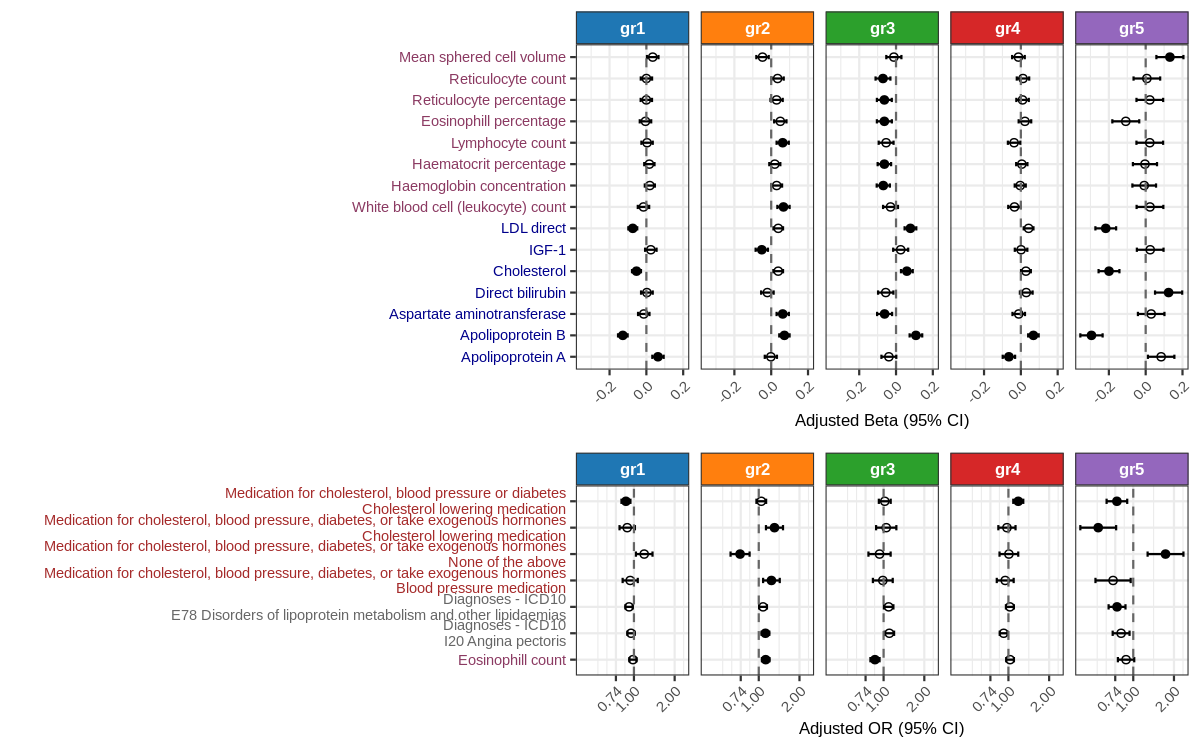

In [39]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 150)
outFold
endopheno_forest_plot(colorFile = colorFile, res_pheno = phenotype_sign, outFold = outFold)

In [40]:
# top drug response 
length(unique(cl_drug_response$treat_id))
length(unique(cl_drug_response$pheno_id))
length(unique(cl_drug_response$pheno_class))
table( cl_drug_response$treat_meaning, cl_drug_response$treat_Field)
unique(cl_drug_response$pheno_class)

[1] 17

[1] 87

[1] 8

                                 
                                  Medication for cholesterol, blood pressure or diabetes
  Aspirin                                                                              0
  Blood pressure medication                                                          810
  Calcium                                                                              0
  Cholesterol lowering medication                                                    810
  Folic acid or Folate (Vit B9)                                                        0
  Glucosamine                                                                          0
  Ibuprofen (e.g. Nurofen)                                                             0
  Insulin                                                                            810
  Iron                                                                                 0
  Paracetamol                                                               

[1] "Blood_biochemistry" "Blood_count"        "Blood_pressure"    
[4] "Body_size_measures" "Impedance_measures" "Arterial_stiffness"
[7] "Hand_grip_strength" "Blood_count_ratio"

17 treatments against 87 phenotypes (8 macro class) 

In [45]:
drug_sign <- cl_drug_response[cl_drug_response$pvalue_corr_diff <= 0.1,]
drug_sign[order(drug_sign$pvalue_diff)[1:10], ]
#cl_drug_response[grepl('reactive', cl_drug_response$pheno_Field) & 
#                 grepl('Cholesterol', cl_drug_response$treat_meaning) , ]

,treat_id,z_diff,pvalue_diff,gr1_beta,gr1_se_beta,gr1_ORorBeta,gr1_CI_low,gr1_CI_up,gr1_pvalue,gr2_beta,⋯,gr2_pvalue,comp,treat_Field,treat_meaning,pheno_id,pheno_Field,pheno_meaning,pheno_type,pheno_class,pvalue_corr_diff
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>
10472,p6153_6177_3,-4.175134,2.978109e-05,-0.03773808,0.08229426,-0.03773808,-0.19903187,0.12355571,6.465629e-01,0.51227589,⋯,6.769058e-07,gr4_vs_gr3,"Medication for cholesterol, blood pressure or diabetes",Insulin,30100,Mean platelet (thrombocyte) volume,NA,CONTINUOUS,Blood_count,0.002471831
8798,p6155_6,3.932957,8.390725e-05,0.49093561,0.20696376,0.49093561,0.08529410,0.89657711,1.795366e-02,-0.38729435,⋯,3.955548e-06,gr5_vs_gr2,Vitamin and mineral supplements,Folic acid or Folate (Vit B9),30750,Glycated haemoglobin (HbA1c),NA,CONTINUOUS,Blood_biochemistry,0.006293044
7523,p6155_6,-3.697328,2.178808e-04,-0.40722721,0.10176167,-0.40722721,-0.60667642,-0.20777799,6.395695e-05,0.10165357,⋯,2.727310e-01,gr4_vs_gr2,Vitamin and mineral supplements,Folic acid or Folate (Vit B9),30870,Triglycerides,NA,CONTINUOUS,Blood_biochemistry,0.018955628
7536,p6155_2,3.666670,2.457299e-04,0.12171589,0.08554986,0.12171589,-0.04595875,0.28939052,1.548838e-01,-0.32210486,⋯,1.710013e-04,gr4_vs_gr2,Vitamin and mineral supplements,Vitamin B,30880,Urate,NA,CONTINUOUS,Blood_biochemistry,0.021378505
11883,p6153_6177_3,-3.638145,2.746083e-04,-0.26784099,0.18814099,-0.26784099,-0.63659055,0.10090858,1.549944e-01,0.51227589,⋯,6.769058e-07,gr5_vs_gr3,"Medication for cholesterol, blood pressure or diabetes",Insulin,30100,Mean platelet (thrombocyte) volume,NA,CONTINUOUS,Blood_count,0.020595621
11417,p6179_2,-3.636446,2.764256e-04,-0.36095074,0.09949193,-0.36095074,-0.55595135,-0.16595014,3.061988e-04,0.04928620,⋯,3.541207e-01,gr5_vs_gr3,Mineral and other dietary supplements,Glucosamine,30710,C-reactive protein,NA,CONTINUOUS,Blood_biochemistry,0.020731919
3447,p6179_5,3.624954,2.890132e-04,-0.19764467,0.09427520,-0.19764467,-0.38242066,-0.01286868,3.609982e-02,-0.63779122,⋯,9.602810e-17,gr4_vs_gr1,Mineral and other dietary supplements,Iron,30020,Haemoglobin concentration,NA,CONTINUOUS,Blood_count,0.025144147
6263,p6155_4,3.529005,4.171252e-04,0.34489612,0.13641853,0.34489612,0.07752070,0.61227153,1.152174e-02,-0.26294800,⋯,1.243377e-02,gr3_vs_gr2,Vitamin and mineral supplements,Vitamin D,30080,Platelet count,NA,CONTINUOUS,Blood_count,0.024239462
2094,p6154_3,3.524594,4.241323e-04,0.23725629,0.04510380,0.23725629,0.14885447,0.32565811,1.553427e-07,0.04468876,⋯,1.472853e-01,gr3_vs_gr1,"Medication for pain relief, constipation, heartburn",Paracetamol,30080,Platelet count,NA,CONTINUOUS,Blood_count,0.035202978


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


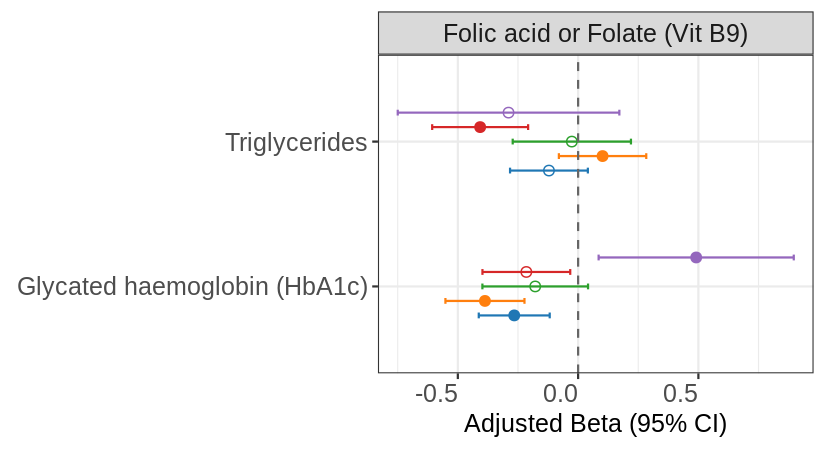

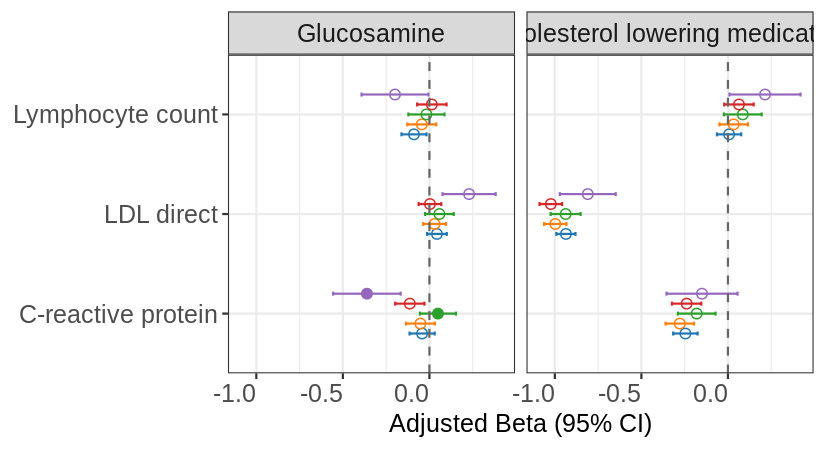

In [57]:
## plot specific treatment response ##
options(repr.plot.width = 5.5, repr.plot.height = 3, repr.plot.res = 150)

# consider only medicine specific for CAD
p1 <- cl_drug_response[cl_drug_response$pheno_Field %in% c('LDL direct',
                                                           'Lymphocyte count', 'C-reactive protein') & 
                  cl_drug_response$treat_meaning %in% c('Glucosamine', 'Cholesterol lowering medication'),]

p2 <- cl_drug_response[cl_drug_response$pheno_Field %in% c('Glycated haemoglobin (HbA1c)', 'Triglycerides') & 
                  cl_drug_response$treat_meaning %in% c('Folic acid or Folate (Vit B9)'),]

p3 <- cl_drug_response[cl_drug_response$pheno_Field %in% c('Mean platelet (thrombocyte) volume', 'Weight') & 
                  cl_drug_response$treat_meaning %in% c('Insulin'),]
                

res_treat <- rbind(p1, p2, p3)
res_treat$comb_name <- paste0(res_treat$pheno_id, '_and_', res_treat$treat_id)
df_red <- res_treat

df_red$new_id <- df_red$pheno_Field
df_red$new_id[!is.na(df_red$pheno_meaning)] <- paste(df_red$pheno_meaning[!is.na(df_red$pheno_meaning)], 
                                                     df_red$pheno_Field[!is.na(df_red$pheno_meaning)], sep = '\n')
df_red$new_id <- factor(df_red$new_id, levels = unique(df_red$new_id))
df_red$pheno_type <- factor(df_red$pheno_type, levels = unique(df_red$pheno_type))
df_red$type_res <- 'beta'
df_red$type_res[df_red$pheno_type!= 'CONTINUOUS'] <- 'OR'
df_red$type_res <- factor(df_red$type_res, levels = c('OR', 'beta'))
df_red$treat_meaning <- factor(df_red$treat_meaning, levels = c('Glucosamine', 
                                                                'Vitamin D',
                                                                'Iron', 'Folic acid or Folate (Vit B9)',
                                                                'Cholesterol lowering medication', 'Insulin'))
df_red$sign <- 'no'
df_red$sign[df_red$pvalue_corr_diff <= 0.05] <- 'yes'
df_red$sign <- factor(df_red$sign, levels = c('no', 'yes'))
df_red$gr1 <- sapply(df_red$comp, function(x) strsplit(x, split = '_vs_')[[1]][1])
df_red$gr2 <- sapply(df_red$comp, function(x) strsplit(x, split = '_vs_')[[1]][2])

tot_gr <- sort(unique(c(as.character(df_red$gr1),  as.character(df_red$gr2))))

df_tot_gr <- list()
for(i in 1:length(tot_gr)){
  
  tmp <- df_red[df_red$gr1 == tot_gr[i] | df_red$gr2 == tot_gr[i], ]
  feat_name <- unique(tmp$comb_name)
  df_tot_gr[[i]] <- data.frame(comb_name =c(),gr =c(), sign =c(),pheno_class =c(),new_id =c(),treat_meaning  =c(),
                               gr_ORorBeta =c(),gr_CI_low =c(), gr_CI_up =c())
  for(j in 1:length(feat_name)){
    df_new <- data.frame(comb_name = feat_name[j], gr = tot_gr[i], sign = any(tmp$sign[tmp$comb_name == feat_name[j]] == 'yes'), 
                         pheno_class = tmp$pheno_class[tmp$comb_name == feat_name[j]][1], 
                         new_id = tmp$new_id[tmp$comb_name == feat_name[j]][1], 
                         treat_meaning = tmp$treat_meaning[tmp$comb_name == feat_name[j]][1], 
                         pheno_type = tmp$pheno_type[tmp$comb_name == feat_name[j]][1])
    name_gr <- ifelse(any(tot_gr[i] %in% tmp$gr1[tmp$comb_name == feat_name[j]]), 'gr1', 'gr2')
    df_new$gr_ORorBeta <- tmp[tmp$comb_name == feat_name[j], paste0(name_gr, '_ORorBeta')][1]
    df_new$gr_CI_low <- tmp[tmp$comb_name == feat_name[j], paste0(name_gr, '_CI_low')][1]
    df_new$gr_CI_up <- tmp[tmp$comb_name == feat_name[j], paste0(name_gr, '_CI_up')][1]
    df_tot_gr[[i]] <- rbind(df_tot_gr[[i]], df_new)
  }
}
df_tot_gr <- do.call(rbind, df_tot_gr)
df_tot_gr$gr <- factor(df_tot_gr$gr, levels = unique(df_tot_gr$gr))

len_w <- 7
len_h <- 7 + length(unique(df_tot_gr$gr))*0.1

gr_color <- pal_d3(palette = 'category20')(length(unique(df_tot_gr$gr)))

pl_beta_p2 <-  ggplot(subset(df_tot_gr, treat_meaning %in% c('Folic acid or Folate (Vit B9)')), 
                      aes(x = new_id, y = gr_ORorBeta, group = gr, color = gr, shape = sign))+
  geom_point(size = 2, position=position_dodge(0.5))+
  geom_errorbar(aes(ymin=gr_CI_low, ymax=gr_CI_up), width=.2, position=position_dodge(0.5))+
  theme_bw()+ 
  ylab('Adjusted Beta (95% CI)')+geom_hline(yintercept = 0, linetype = 'dashed', color = 'grey40')+
  facet_wrap(treat_meaning~., nrow = 1, strip.position="top")+
  theme(legend.position = 'none', legend.title = element_blank(), 
        legend.text = element_text(size = 12), 
        plot.title = element_text(size=12), axis.title.y = element_blank(), 
        axis.title.x = element_text(size = 12),
        axis.text.x = element_text(size = 12, angle = 0, hjust = 1), 
        axis.text.y = element_text(size = 12), strip.text = element_text(size=12))+
  scale_shape_manual(values=c(1, 19))+
  scale_color_manual(values=gr_color)+guides(shape=FALSE)+
  coord_flip()
pl_beta_p2
                     
ggsave(filename = sprintf('%stscore_corrPCs_zscaled_cluster%s_PGmethod_HKmetric_treatmentResponse_pairwise_%smedAll_subset2.pdf', outFold, 'Cases', 'CAD'), 
       width = 4, height = 3, plot = pl_beta_p2, device = 'pdf')


pl_beta_p1 <-  ggplot(subset(df_tot_gr, treat_meaning %in% c('Glucosamine', 'Cholesterol lowering medication')), 
                      aes(x = new_id, y = gr_ORorBeta, group = gr, color = gr, shape = sign))+
  geom_point(size = 2, position=position_dodge(0.5))+
  geom_errorbar(aes(ymin=gr_CI_low, ymax=gr_CI_up), width=.2, position=position_dodge(0.5))+
  theme_bw()+ 
  ylab('Adjusted Beta (95% CI)')+geom_hline(yintercept = 0, linetype = 'dashed', color = 'grey40')+
  facet_wrap(treat_meaning~., nrow = 1, strip.position="top")+
  theme(legend.position = 'none', legend.title = element_blank(), 
        legend.text = element_text(size = 12), 
        plot.title = element_text(size=12), axis.title.y = element_blank(), 
        axis.title.x = element_text(size = 12),
        axis.text.x = element_text(size = 12, angle = 0, hjust = 1), 
        axis.text.y = element_text(size = 12), strip.text = element_text(size=12))+
  scale_shape_manual(values=c(1, 19))+
  scale_color_manual(values=gr_color)+guides(shape=FALSE)+
  coord_flip()
pl_beta_p1
                     
ggsave(filename = sprintf('%stscore_corrPCs_zscaled_cluster%s_PGmethod_HKmetric_treatmentResponse_pairwise_%smedAll_subset1.pdf', outFold, 'Cases', 'CAD'), 
       width = 5.5, height = 3, plot = pl_beta_p1, device = 'pdf')



In [59]:
# plot specific treatment response
plot_original_treatresponse <- function(phenoInfo, treatInfo, clust_res, phenoDat, 
                                        phenoOriginal, treatDat, 
                                        pheno_name, treat_name){
    pheno_id <- phenoInfo$pheno_id[phenoInfo$Field == pheno_name]
    treat_id <- treatInfo$pheno_id[treatInfo$Coding_meaning %in% treat_name]
    if(length(treat_id) > 1){
        tmp <- paste0(sapply(treat_id, function(x) strsplit(x, split = '_')[[1]][1]), collapse = '_')
        treat_id <- paste(tmp, strsplit(treat_id[1], split = '_')[[1]][2],sep = '_')              
    }
    print(treat_id)
    print(pheno_id)
    cl <- clust_res$cl_best

    df <- data.frame(id = cl$id, gr = cl$gr, 
                 pheno = phenoDat[match(cl$id, phenoDat$Individual_ID), pheno_id], 
                 pheno_or = phenoOriginal[match(cl$id, paste0('X',phenoOriginal$new_userId)), paste0('x', pheno_id, '_0_0')],
                 treat = treatDat[match(cl$id, treatDat$Individual_ID), paste0('p', treat_id)])

    df$gr <- paste0('gr',df$gr)
    df$gr <- factor(df$gr, levels = paste0('gr', sort(unique(cl$gr))))
    df$treat <- factor(df$treat)
    # remove NA values:
    df <- df[!is.na(df$treat) & !is.na(df$pheno),]
    gr_color <- pal_d3(palette = 'category20')(length(unique(df$gr)))
    ymin <- min(df$pheno_or)
    ymax <- quantile(df$pheno_or, probs = 0.98)
                             
    pl_box_original <-  ggplot(df, aes(x = gr, y = pheno_or, fill = treat))+
      geom_point(size = 0.1, alpha = 0.3, position = position_jitterdodge())+  
      geom_boxplot(outlier.shape = NA, alpha = 0.5)+
      theme_bw()+ 
      ylim(ymin,ymax)+
      ylab(pheno_name)+
      theme(legend.position = 'bottom', legend.title = element_text(size = 13), legend.text = element_text(size = 12), 
        plot.title = element_text(size=12), axis.title.x = element_blank(),
        axis.text.x = element_text(size = 12, angle = 0, hjust = 0.5, colour = gr_color), axis.text.y = element_text(size = 13))+
     scale_fill_manual(name = treat_name,values=c('lightgrey', 'lightsalmon1'))

    pl_box <-  ggplot(df, aes(x = gr, y = pheno, fill = treat))+
      geom_point(size = 0.1, alpha = 0.3, position = position_jitterdodge())+  
      geom_boxplot(outlier.shape = NA, alpha = 0.5)+
      theme_bw()+ 
      ylab(pheno_name)+
      theme(legend.position = 'bottom', legend.title = element_text(size = 13), legend.text = element_text(size = 12), 
        plot.title = element_text(size=12), axis.title.x = element_blank(),
        axis.text.x = element_text(size = 12, angle = 0, hjust = 0.5, colour = gr_color), axis.text.y = element_text(size = 13))+
     scale_fill_manual(name = treat_name,values=c('lightgrey', 'lightsalmon1'))

    return(list(original = pl_box_original, converted = pl_box))

}

[1] "6179_2"
[1] "30710"


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 361 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 361 rows containing missing values (geom_point).”
Warning message:
“Removed 361 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 361 rows containing missing values (geom_point).”


[1] "6153_6177_1"
[1] "30780"


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 359 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 359 rows containing missing values (geom_point).”


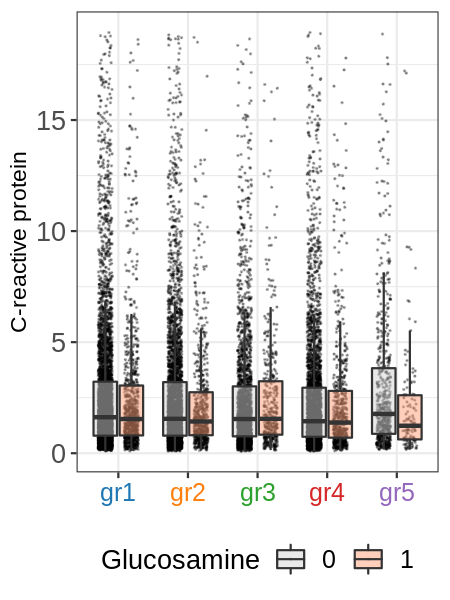

Warning message:
“Removed 359 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 359 rows containing missing values (geom_point).”


[1] "6155_6"
[1] "30750"


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 361 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 361 rows containing missing values (geom_point).”


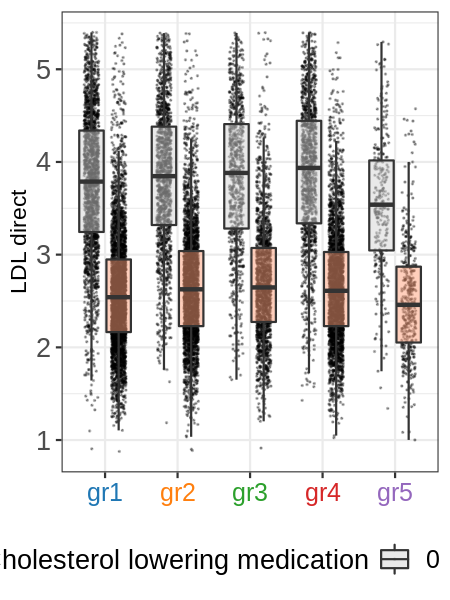

Warning message:
“Removed 361 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 361 rows containing missing values (geom_point).”


[1] "6153_6177_1"
[1] "30710"


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 359 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 359 rows containing missing values (geom_point).”


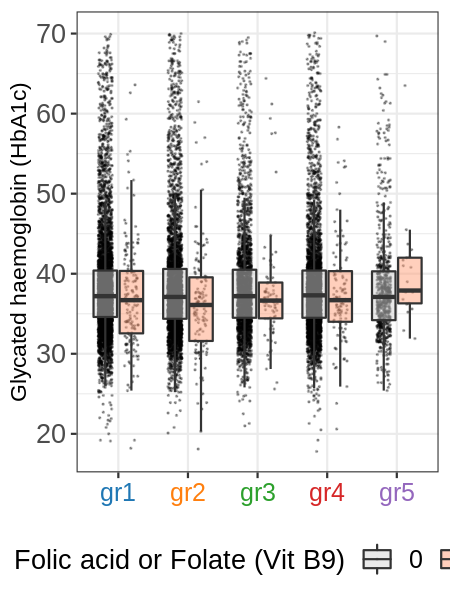

Warning message:
“Removed 359 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 359 rows containing missing values (geom_point).”


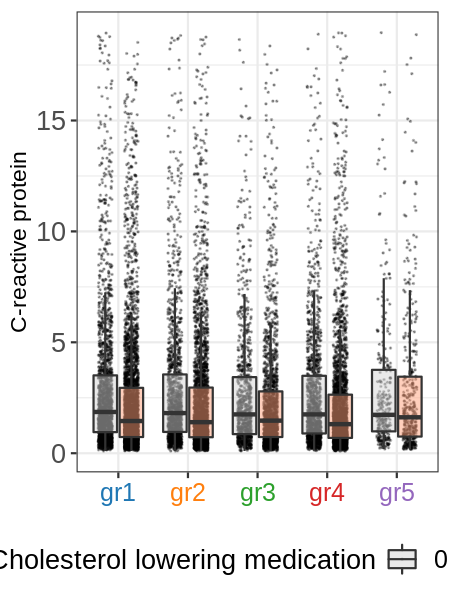

In [69]:
## plot actual data ##
options(repr.plot.width = 3, repr.plot.height = 4, repr.plot.res = 150)

# load original data
phenoOriginal_file <- 'INPUT_DATA_GTEx/CAD/Covariates/UKBB/ukb40052_project25214_filtered_britishWhiteUnrelated_pheno.tab'
phenoOriginal <- fread(phenoOriginal_file, h=T, stringsAsFactors = F, data.table = F)
# convert id
id_conv <- fread('/psycl/g/mpsukb/UKBB_hrc_imputation/oxford/samples_unrelated_ukb25214_ukb34217', h=T, stringsAsFactors = F)
phenoOriginal$new_userId <- id_conv$ukb34217[match(phenoOriginal$userId, id_conv$ukb25214)]

# load phenotype matrix
pheno_file <- 'INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/phenotypeMatrix_CADHARD_All_phenoAssoc_withMedication.txt'
phenoInfo_file <- 'INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/phenotypeDescription_withMedication.txt'
phenoDat <- fread(pheno_file, h=T, stringsAsFactors = F, data.table = F)
phenoInfo <- fread(phenoInfo_file, h=T, stringsAsFactors = F, data.table = F)

# load treatment info
treat_file <- 'INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/covariateMatrix_CADHARD_All_phenoAssoc_withMedication.txt'
treatInfo_file <- 'INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/phenotypeDescription_covariateMatrix_withMedication.txt'
treatDat <- fread(treat_file, h=T, stringsAsFactors = F, data.table = F)
treatInfo <- fread(treatInfo_file, h=T, stringsAsFactors = F, data.table = F)

pheno_name <- 'C-reactive protein'
treat_name <- 'Glucosamine'


# plot specific treatment response
plot_original_treatresponse <- function(phenoInfo, treatInfo, cl, phenoDat, 
                                        phenoOriginal, treatDat, 
                                        pheno_name, treat_name){
    pheno_id <- phenoInfo$pheno_id[phenoInfo$Field == pheno_name]
    treat_id <- treatInfo$pheno_id[treatInfo$Coding_meaning %in% treat_name]
    if(length(treat_id) > 1){
        tmp <- paste0(sapply(treat_id, function(x) strsplit(x, split = '_')[[1]][1]), collapse = '_')
        treat_id <- paste(tmp, strsplit(treat_id[1], split = '_')[[1]][2],sep = '_')              
    }
    print(treat_id)
    print(pheno_id)

    df <- data.frame(id = cl$id, gr = cl$gr, 
                 pheno = phenoDat[match(cl$id, phenoDat$Individual_ID), pheno_id], 
                 pheno_or = phenoOriginal[match(cl$id, paste0('X',phenoOriginal$new_userId)), paste0('x', pheno_id, '_0_0')],
                 treat = treatDat[match(cl$id, treatDat$Individual_ID), paste0('p', treat_id)])

    df$gr <- paste0('gr',df$gr)
    df$gr <- factor(df$gr, levels = paste0('gr', sort(unique(cl$gr))))
    df$treat <- factor(df$treat)
    # remove NA values:
    df <- df[!is.na(df$treat) & !is.na(df$pheno),]
    gr_color <- pal_d3(palette = 'category20')(length(unique(df$gr)))
    ymin <- min(df$pheno_or)
    ymax <- quantile(df$pheno_or, probs = 0.98)
                             
    pl_box_original <-  ggplot(df, aes(x = gr, y = pheno_or, fill = treat))+
      geom_point(size = 0.1, alpha = 0.3, position = position_jitterdodge())+  
      geom_boxplot(outlier.shape = NA, alpha = 0.5)+
      theme_bw()+ 
      ylim(ymin,ymax)+
      ylab(pheno_name)+
      theme(legend.position = 'bottom', legend.title = element_text(size = 13), legend.text = element_text(size = 12), 
        plot.title = element_text(size=12), axis.title.x = element_blank(),
        axis.text.x = element_text(size = 12, angle = 0, hjust = 0.5, colour = gr_color), axis.text.y = element_text(size = 13))+
     scale_fill_manual(name = treat_name,values=c('lightgrey', 'lightsalmon1'))

    pl_box <-  ggplot(df, aes(x = gr, y = pheno, fill = treat))+
      geom_point(size = 0.1, alpha = 0.3, position = position_jitterdodge())+  
      geom_boxplot(outlier.shape = NA, alpha = 0.5)+
      theme_bw()+ 
      ylab(pheno_name)+
      theme(legend.position = 'bottom', legend.title = element_text(size = 13), legend.text = element_text(size = 12), 
        plot.title = element_text(size=12), axis.title.x = element_blank(),
        axis.text.x = element_text(size = 12, angle = 0, hjust = 0.5, colour = gr_color), axis.text.y = element_text(size = 13))+
     scale_fill_manual(name = treat_name,values=c('lightgrey', 'lightsalmon1'))

    return(list(original = pl_box_original, converted = pl_box))

}

pl1 <-  plot_original_treatresponse(phenoInfo, treatInfo, res_cl, phenoDat, 
                                        phenoOriginal, treatDat, 
                                        'C-reactive protein', 'Glucosamine')
pl1$original
ggsave(filename = sprintf('%soriginalPheno_%s_treat%s.pdf', outFold, 'C-reactive protein', 'Glucosamine'), 
       plot = pl1$original, width = 3, height = 4)
                             
pl2 <- plot_original_treatresponse(phenoInfo, treatInfo, res_cl, phenoDat, 
                                        phenoOriginal, treatDat, 
                                        'LDL direct', 'Cholesterol lowering medication')
pl2$original
ggsave(filename = sprintf('%soriginalPheno_%s_treat%s.pdf', outFold, 'LDL direct', 'Cholesterol lowering medication'), 
       plot = pl2$original, width = 3, height = 4)

pl3 <- plot_original_treatresponse(phenoInfo, treatInfo, res_cl, phenoDat, 
                                        phenoOriginal, treatDat, 
                                        'Glycated haemoglobin (HbA1c)', 'Folic acid or Folate (Vit B9)')
pl3$original
ggsave(filename = sprintf('%soriginalPheno_%s_treat%s.pdf', outFold, 'Glycated haemoglobin (HbA1c)', 'Folic acid or Folate (Vit B9)'), 
       plot = pl3$original, width = 3, height = 4)

pl4 <- plot_original_treatresponse(phenoInfo, treatInfo, res_cl, phenoDat, 
                                        phenoOriginal, treatDat, 
                                        'C-reactive protein', 'Cholesterol lowering medication')
pl4$original
ggsave(filename = sprintf('%soriginalPheno_%s_treat%s.pdf', outFold, 'C-reactive protein', 'Cholesterol lowering medication'), 
       plot = pl4$original, width = 3, height = 4)
                             

In [70]:
#a = cl_drug_response[cl_drug_response$pheno_Field == 'Lymphocyte count',]
#a = a[(a$gr1_beta < 0 & a$gr1_pvalue <= 0.01) | (a$gr2_beta < 0 & a$gr2_pvalue <= 0.01),]
#a[order(a$pvalue_diff),]
# same plot as Figure 3, argument that group5 could use glucosamine instead of statin to decrease C-reactive protein
# the only very significant association is glucosamine!